In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import wrds
import pandas_datareader.data as web

def get_factors(factors='CAPM'):   
    if factors=='CAPM':
        fama_french = web.DataReader("F-F_Research_Data_Factors_daily", "famafrench",start="1921-01-01")
        daily_data = fama_french[0]
        daily_data.index = pd.to_datetime(daily_data.index)
        df_factor = daily_data[['RF','Mkt-RF']] 
    elif factors=='FF3':
        fama_french = web.DataReader("F-F_Research_Data_Factors_daily", "famafrench",start="1921-01-01")
        daily_data = fama_french[0]
        daily_data.index = pd.to_datetime(daily_data.index)
        df_factor = daily_data[['RF','Mkt-RF','SMB','HML']]
    elif factors=='FF5':
        fama_french = web.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench",start="1921-01-01")
        daily_data = fama_french[0]
        daily_data.index = pd.to_datetime(daily_data.index)
        df_factor = daily_data[['RF','Mkt-RF','SMB','HML','RMW','CMA']]
    else:
        fama_french = web.DataReader("F-F_Research_Data_5_Factors_2x3_daily", "famafrench",start="1921-01-01")
        daily_data = fama_french[0]
        daily_data.index = pd.to_datetime(daily_data.index)
        df_factor = daily_data[['RF','Mkt-RF','SMB','HML','RMW','CMA']]
        fama_french = web.DataReader("F-F_Momentum_Factor_daily", "famafrench",start="1921-01-01")
        df_factor=df_factor.merge(fama_french[0],on='Date')    

    return df_factor/100



# Capital Allocation

How should you allocate capital?

This question can be decomposed in two:

1. How large is my risk portfolio? This comes down to determining how much risk do you want to take
2. How will I split this portfolio across assets

How to approach these questions depend on whether you are investing as principal (i.e. on your behalf) or as a delegate (a manager in a hedge fund)



**1. The Portfolio risk decision**

The benefit of risk-taking is the extra expected return you get relative to the risk-free rate. 
That is true both for a principal and a delegate
You wealth is expected to grow faster (either directly or indirectly trough your performance compensation)

The cost is the "risk". It is important to think exactly what you fear to think about how costly taking on risk is for you

**A. Principal**

* What do you want to do with the money and when?
* How terrible you feel if you have less than you expected
* How much joy would you enjoy if you had more
* Do you have commitments that you absolutely need to satisfy?
    * Minimum retirement income
    * Minimum balance in college fund
    * Minimum budget for health issues
    * Future purchase of a property
* Commitments will push you to take less risk if you currently have enough money to fulfill them 
  * Complete de-risking guarantees you can honor these commitments
* We often talk about someone risk-aversion to describe how painful risk-taking is

**B. Delegate**

*  The delegate certainly has stop loss rule
*  If they lose more than that amount they are forced to liquidate their positions and they are likely to be fired
*  Such stop loss is particularly biding for new managers
*  This stop loss might be explicit:the fund principal literally tells what it is
*  But most likely is implicitly--there is a loss that investors will freak out and pull out
*  You got to think for yourself and have very clearly what the number is
  

**Formalizing their problems**  
* I think is more useful to think in terms of the one-year ahead looses you are comfortable with. 
  * F is the CDF of a standard normal, and $F^{-1}$ is it's quantile function
  * h is a scalar greater than 1 that adjusts for deviation from the normal. 
  * For example h=1.5 will mean that a 3 sigma event is as likely as a 3/h=2 sigma event
  * You pick a probability, $\underline{p}$, 
  * And a maximum loss $\overline{L}$ for  your portfolio in 1 year

$$hF^{-1}(\underline{p})\sigma\geq-\overline{L}$$

Then 
 

$$\sigma\leq-\frac{\overline{L}}{hF^{-1}(\underline{p})}$$

for $\underline{p}=5 \%$, $\overline{L}=30\%$,h=2 what do we get?


In [7]:
from scipy.stats import norm

p=0.05
h=2
L=0.3
sigma=-L/(norm.ppf(p)*h)
sigma

0.09119352478676533

You might want to incorporate your views on the portfolio expected return

That is relevant in case your horizons are one year or longer. 

For horizons that are 1 month or shorter you are safe ignoring the expected value since the volatility totally dominates

Now we write the problem as what fraction of your wealth w, you should invest in this portfolio

the mode you invest, the higher the expected growth $w\mu+rf$, but also the higher your wealth vol $x\sigma$


$$w(hF^{-1}(\underline{p})\sigma+\mu)+rf\geq-\overline{L}$$

to again represent in terms of total vol you choose to take I will rewrite


$$w\sigma(hF^{-1}(\underline{p})+\frac{\mu}{\sigma})+rf\geq-\overline{L}$$

Now note that $F^{-1}(\underline{p})$ is a negative number and $\frac{\mu}{\sigma}$ is positive


Lets first assume $hF^{-1}(\underline{p})+\frac{\mu}{\sigma}<0$ which is the realistic case


$$w\sigma\leq-\frac{\overline{L}+rf}{(hF^{-1}(\underline{p})+\frac{\mu}{\sigma})}$$

- A higher risk-free rate means you can take more vol, since you start from a higher expected baseline
  - It is natural to have a real rate here since you probably care about your purchasing power
- Sharpe Ratio: We can the ratio of the portfolio expected excess return, it't risk-premium, relative to the portfolio volatility, the Sharpe Ratio

$$SR=\frac{E[r]-rf}{\sqrt{Var(r)}}=\frac{E[r^e]}{\sigma}=\frac{\mu}{\sigma}$$

- The higher the Sharpe ratio, the less negative is $hF^{-1}(\underline{p})+\frac{\mu}{\sigma}$ and the higher is the higher the volatility you choose to take

Lets plug some numbers with $rf=1\%$ and SR=0.4 ( that is the market Sharpe ratio)

$$-\frac{0.3+0.01}{2*(-1.64)+0.4}$$

In [35]:


def calculate_sigma(L, h, p,sr,rf):
    return -(L+rf) / (h*norm.ppf(p) +sr)




# Example usage
L = 0.3
h = 2
p = 0.05
rf=0.01
sigma = calculate_sigma(L, h, p,0,rf)
print(sigma)
sigma = calculate_sigma(L, h, p,0.4,rf)
print(sigma)
sigma = calculate_sigma(L, h, p,1,rf)
print(sigma)
print(h*norm.ppf(p))
sigma = calculate_sigma(L, h, p,3.2896,rf)
print(sigma)


0.09423330894632417
0.10727730277221074
0.13538848665984968
-3.2897072539029457
2890.3377078699764


As your SR grows that loss becomes less likely than 5% and the amount of risk that you can take while being 95% sure that you will not lose 30% of your dollars goes to infinity

In this case you can simply adjust your confidence probabilities



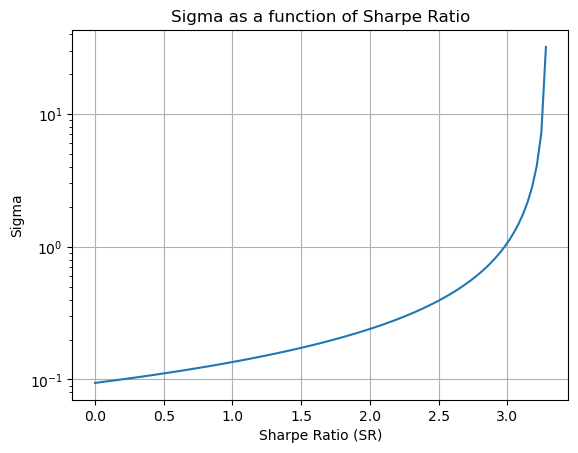

In [40]:
calculate_sigma(L, h, 0.04,3.28,rf)
sr_values = np.linspace(0, 3.28, 100)
sigma_values = [calculate_sigma(L, h, p, sr, rf) for sr in sr_values]

plt.plot(sr_values, sigma_values)
plt.yscale('log')
plt.xlabel('Sharpe Ratio (SR)')
plt.ylabel('Sigma')
plt.title('Sigma as a function of Sharpe Ratio')
plt.grid(True)
plt.show()

* Once you Sharpe Ratio is above 3 (as rare as snow in the winter), risk is unlikely to be the limiting factor
* Wat before then you hit at capacity constraints for your trade since your wealth will be growing so wildly fast
    * For SR=3, your wealth grows at $w\sigma*\frac{\mu}{\sigma}=1*3=300\%$ per year!
  

**2. How do I allocate across assets**

Implicit in our discussion is that you have some desired portfolio with some Sharpe ratio $SR_p$ and you are deciding how to invest in it. 

We can already see that having a large Sharpe ratio is a nice thing to have:
 - Increases the growth of your portfolio per unit of risk
 - For the same growth , you need to take less risk
 - Expected growth means you are less likely to have large losses

How to build a portfolio that maximizes you SR?

**IF** you know the vectors of expected excess returns across your assets and their variance covariance matrix the answer is trivial


$$W=w E[R^e]\Sigma_{R}^{-1} $$

where

- w is a scalar that controls the overall volatility of your portfolio, but does not impact the SR
- $E[R^e]$ is the vector of (FORWARD LOOKING) expected excess returns across assets
- $\Sigma_{R}$ is the variance-covariance matrix

This portfolio solves the following problems

1. $ \max_W E[W'R^e_T]-\gamma Var(W'R^e_T)$, for $w=\frac{1}{2\gamma}$
2. $ \max_W E[W'R^e_T]~~~subject~~to~~~Var(W'R^e_T)\leq Vmax $, for $w=\sqrt{\frac{Vmax}{E[R^e]\Sigma_{R}^{-1}E[R^e]'}}$
3. $ \min_W Var(W'R^e_T)~~~subject~~to~~~E[W'R^e_T]\geq Emin $, for $w=\frac{Emin}{E[R^e]\Sigma_{R}^{-1}E[R^e]'}$


Lets apply this to the international portfolio we looked at last class


In [43]:
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
# tell python Date is date:
Data['Date']=pd.to_datetime(Data['Date'])
# set an an index
Data=Data.set_index(['Date'])
Rf=Data['RF']
Data=Data.drop(columns=['RF']).subtract(Data['RF'],axis=0)
Data.head()

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839


In [45]:
# lets assume the sample moments are the true moments of the distribution


muR=Data.mean()
display(muR)
SigmaR=Data.cov()
display(SigmaR)
# this inverts the variance covariance matrix
display(np.linalg.inv(SigmaR))
W= np.linalg.inv(SigmaR) @ muR
display(W)

MKT                 0.005140
USA30yearGovBond    0.002523
EmergingMarkets     0.006923
WorldxUSA           0.004149
WorldxUSAGovBond    0.002054
dtype: float64

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001948,0.000111,0.001292,0.001264,0.000187
USA30yearGovBond,0.000111,0.001227,-0.000204,-0.000013,0.000264
EmergingMarkets,0.001292,-0.000204,0.003556,0.001661,0.000249
WorldxUSA,0.001264,-0.000013,0.001661,0.002182,0.000422
WorldxUSAGovBond,0.000187,0.000264,0.000249,0.000422,0.000407


array([[ 886.9351877 , -163.1566812 , -133.47716321, -463.61463361,
         260.65110274],
       [-163.1566812 , 1029.7603189 ,   83.97391735,  201.95839425,
        -854.35594033],
       [-133.47716321,   83.97391735,  462.95743432, -276.66588761,
          10.81093193],
       [-463.61463361,  201.95839425, -276.66588761, 1113.82507458,
        -904.79801414],
       [ 260.65110274, -854.35594033,   10.81093193, -904.79801414,
        3826.58967227]])

array([ 1.83533361,  1.42337262,  1.60522251, -1.02642088,  3.36582305])

- Can you check that applying the little w above it will indeed solve problems 2 and 3?
- Can you check that the SR of portfolio w*W is invariant to little w?


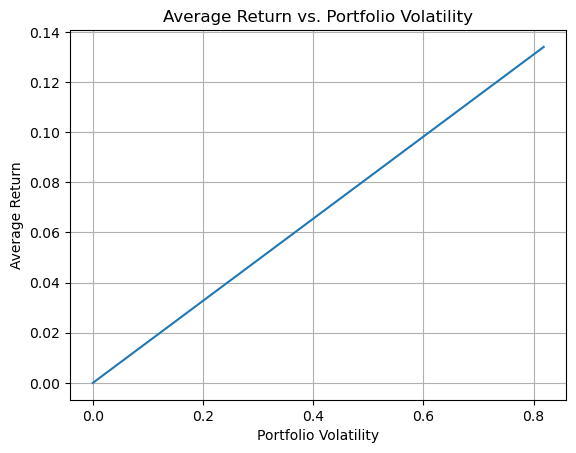

In [46]:
# Define the range of w values
w_values = np.linspace(0, 5, 100)

# Calculate the portfolio returns and volatilities for each w
portfolio_returns = []
portfolio_volatilities = []

for w in w_values:
    weights = w * np.linalg.inv(SigmaR) @ muR
    portfolio_return = weights @ muR
    portfolio_volatility = np.sqrt(weights @ SigmaR @ weights)
    
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)

# Plot the results
plt.plot(portfolio_volatilities, portfolio_returns)
plt.xlabel('Portfolio Volatility')
plt.ylabel('Average Return')
plt.title('Average Return vs. Portfolio Volatility')
plt.grid(True)
plt.show()

What does it mean that the relationship between Expected return and volatility is linear?

Is that what you expect? Is that true in general as you change portfolio weights?

**In reality** knowing the true moments of the return distribution is HARD as we discussed a few classes ago

**In reality** your portfolio is not all you care about


It is useful to decompose your allocation in terms of "factor bets" and "alpha bets"


We will now focus on the "alpha" aspect of allocation and revisit factor allocation once we introduce multi-factor models

Most fund managers have tight limits on factor exposures anyways, so factor exposure is more of a consequence of your alpha bets that you need to control rather then a form of investing.


Let's say that you identified N trading strategies

- You believe their alphas are A (N by 1)
- You estimate their factor Betas B (N by 1)
- And their idio variance $\Sigma_{\epsilon}$, which is diagonal. These are idio bets after you remove the factor exposure
- You have a mandate to have zero factor exposure.

What is your optimal portfolio ( we are focusing now on the composition, lets put the level of risk aside) ?
- What is your allocation on each trading strategy?
- Assuming you can trade the factor, how much of it you buy/sell directly?


Examples:

same alpha, same betas, same idio


differnt alpha, same beta , same indio


same alpha, different betas, same idio




  


In [ ]:
A=np.arrary([0.3,0.2,0.1,0.05])
B=np.array([1,2,0.5,-0.5])
Sigmae=np.diag([0.4,0.4,0.4,0.4])**2

The solution is $w*W$ and $w*W_f$ for any scalar w, where

$W=A\Sigma_{\epsilon}^{=1}$ 

$W_f=-W'\Beta$

where 

$$A\Sigma_{\epsilon}^{=1}=\left[\alpha_1,\alpha_2,...,\alpha_N\right]\left[\begin{array}{ccc}\sigma^2_{\epsilon,1} & 0 & 0\\0 & \sigma^2_{\epsilon,i} & 0\\0&0&\sigma^2_{\epsilon,N}\end{array}\right]^{-1}=\left[\begin{array}{c}\frac{\alpha_1}{\sigma^2_{\epsilon,1} }\\\frac{\alpha_2}{\sigma^2_{\epsilon,2} }\\...\\\frac{\alpha_N}{\sigma^2_{\epsilon,N} }\end{array}\right]$$


The fact that all the trading strategies are stripped out of the co-movement leads to a really clean formula

You can rewrite in terms of volatility allocations in each strategy

$$W_i\sigma_{\epsilon,i}=\frac{\alpha_i}{\sigma_{\epsilon,i}}$$

We refer to $\frac{\alpha_i}{\sigma{\epsilon,i}}$ as the strategy **Appraisal Ratio**. Sometimes people call this the "information ratio". It is the "sharpe ratio" of the trading strategy striped out of factor exposure

- recall that $\sigma{\epsilon,i}$ is the volatility of the strategy that is long the asset and short the factor in the optimal hedging 

$$r^e_i-h^if=\alpha_i+\beta_i*f+\epsilon_i+hf$$

so if you set $h=-\beta_i$

$$r^e_i-h^if=\alpha_i+\epsilon_i$$

and follows that $E[r^e_i-h^if]=\alpha_i$ and $Var(r^e_i-h^if)=\sigma_{\epsilon,i}^2$

This is the optimal if you are certain of you alphas

But of course you don't really know, so the industry developed many Ad-hoc approaches for **bet sizing**

**Bet sizing** is one of the great skills in a portfolio manager because it requires instinct for uncertainty 

The different Approaches (w is a scalar that controls the overall size of the portfolio )

- **Mean-variance** rule:
  
$$W_i=w \frac{\alpha_i}{\sigma_{\epsilon,i}^2}$$

- **1/N* rule: ignore the magnitude of the alpha and simply bet on the direction of your idea

$$W_i=\frac{1}{N}\left((\alpha_i>0)-(\alpha_i<0)\right)$$

  * this is good if you have goo hunches for mispricing, but you don't get the magnitudes quite right

- **Proportional** rule: Buy/sell proportional to the alpha

$$W_i=w \alpha_i$$

- **Risky-parity** rule: assumes the Appraisal ratio of your different ideas are the same $\frac{\mu_i}{\sigma_i}=\frac{\mu_j}{\sigma_j}$


$$W_i=w \frac{1}{\sigma_{\epsilon,i}}$$

- **Variance shrinkage** rule: you shrink the variance-covariance matrix towards diagonal

$$W_i=w (\alpha_i>0)\frac{\mu^{+}_{\alpha}}{\sigma_{\epsilon,i}^2+\sigma_{\alpha}^2}+(\alpha_i<0)\frac{\mu^{-}_{\alpha}}{\sigma_{\epsilon,i}^2+\sigma_{\alpha}^2}$$

  - where $\tau$ is the shrinkage factor. 
  - $\mu^{+}_{\alpha}>0$ is your expected average alpha for you long ideas
  - $\mu^{-}_{\alpha}<0$ is your expected average alpha for you shirt ideas
  - As we grow $\tau$, our portfolio converges to the 1/N rule. 
  


**Shrinkage** is a very popular technique and also the lest ad-hoc of the different approaches so it work discussing a bit

The fundamental issue that the mean-variance problem does not deal with is that we are actually quite uncertain about the alphas, but the methods assumes complete certitude


In mathematical terms the MV problem assumes $A$ is a know constant when in fact it is more like a distribution:

$$A\sim N(\mu_{\alpha}I,\sigma^2_{\alpha}I)$$

where $\mu_{\alpha}$ is the expected value . Here we are focused on a manager only with long ideas. The short book is analogous

One could also write $$A\sim N(\mu_{\alpha}I,\sigma^2_{\alpha}1_{NxN})$$

Capturing the idea that there is co-movement in your alpha-judgment

Now his/her problem is (I will use the mean-variance problem case but the two other problems have similar solution)


$$ \max_W E[W'R^e_T]-\gamma Var(W'R^e_T)$$

$$ \max_W E[W'(A+Bf+U)]-\gamma Var(W'(A+Bf+U))$$

Here I will assume $E[f]=0$, so we can simply write the portfolio allocation problem of the **hedged portfolios**


$$ \max_W E[W'(A+U)]-\gamma Var(W'(A+U))$$

$$ \max_W E[W'A]-\gamma \left(WVar(A)W'+WVar(U)W'\right)$$

$$\max_W W'I\mu_{\alpha}-\gamma \left(WIW'\sigma^2_{\alpha}+W\Sigma_{\epsilon}W'\right)$$


The Optimality condition for this problem is


$$I\mu_{\alpha}-2\gamma \left(\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)W'$$

Reorganizing

$$W=\frac{1}{2\gamma}\mu_{\alpha}\left(I\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)^{-1}$$

In this case where there is no co-movement, the approach ignores alpha information of each idea (you use $\mu_{\alpha}$ for all) and you "noise up" the returns by $\sigma^2_{\alpha}$

In case of co-movement , then we have


$$W=\frac{1}{2\gamma}\mu_{\alpha}\left(1\sigma^2_{\alpha}+\Sigma_{\epsilon}\right)^{-1}$$


Lets get to work

- Total portfolio with volatility 30%
- vector of alphas [0.3,0.2,0.1,0.1]
- idio vol 0.2
- sigma alpha 0.05
- mu alpha 0.15
- for simplicity beta=0 for each strategy (or alternatively, you are working with hedged portfolios)

Show the weights under the different allocation rules


## The rise of "pod shops"


Hedge funds used to be associated with Principal traders

- George Soros
- Julian Robertson
- David Tepper
- Paul Tudor Jones
- Steve Cohen
- John Paulson


Now we have the rise of Citadel and Millenium among a few others

Pod shops are organized totally different

Idea generation are done at the pod level in groups of 5-10 people

Capital is allocated to the pod by the hedge fund principal, who monitors exposures and hedges residual factor risk

Why pod traders work for Citadel and not choose to manager their own fund?

**A calculation**

Consider a pod shop with N pods with SR sr and total vol $\sigma$, what is their alpha? What is their SR?


$$E[\sum x^*_ir_i]=E[\sum \frac{\alpha_i}{\sigma^2_i}\alpha_i]=N*sr^2$$


$$Var[\sum x^*_ir_i]=Var[\sum \frac{\alpha_i}{\sigma^2_i}\epsilon_i]=\sum (\frac{\alpha_i}{\sigma^2_i})^2Var[\epsilon_i]$$


$$Var[\sum x^*_ir_i]=\sum (\frac{\alpha_i}{\sigma^2_i})^2\sigma^2_i=N sr^2$$

so the standard deviation of the pool of pods is 

$$sr_{pool}=\frac{Nsr_{pod}^2}{\sqrt{N}sr_{pod}}=\sqrt{N}sr_{pod}$$

The Sharpe ratio of the pool of pods grows with the number of pods

This means that if managed individually, the average pod will accumulate wealth at rate $\sigma*sr$

But if managed in a pool structure, the average pod will accumulate as $\sqrt{N}\sigma*sr$

find a new uncorrelated idea is super valuable!

The marginal change in cash flows are


$$\frac{\sigma*sr_{pool}}{N}$$

- decreases in the number of pods
- But always positive--if indeed similar SR and uncorrelated!

Note that is Under-estimates the value of the pod structure

 - The higher your Sharpe ratio, the more volatility you can take without bearing significant risk of loss (wealth jsut grows too quickly)

But it also not realistic
  - Your marginal pod is likely to be worse or correlated with the others





## Volatility Management

While detecting alpha/risk-premia variation of a strategy in real time is nearly impossible, we learned a few classes ago that we cna detect volatility variation really well.

These ideas together imply that you probably can do better by timing volatility



(here the t subscript denote the distribution of returns for date t+1 as of date t when I make the portfolio allocation)

The crucial necessary condition for this to work is that there is no time-series relationship between alphas and vols

$$cov(\alpha_{i,t},\sigma^2_{i,t})=0$$

This is key. Might or might not be true. But tends to be true.

(actually we only need that relationship is weak enough)

This is true for example in case alpha is constant, or a the very least, you cannot predict variation in it.

Then your optimal portfolio allocation becomes $x_i=\frac{\alpha_i}{\sigma_{i,t}^2}$


So the Sharpe ratio is

$$SR_{\sigma}=\frac{E[x_{i,t}r_{i,t+1}]}{\sqrt{Var(x_{i,t}r_{i,t+1})}}$$


$$SR_{\sigma}=\frac{E[\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1}]}{\sqrt{Var(\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1})}}$$


$$SR_{\sigma}=\alpha_i\sqrt{E\left[\frac{1}{\sigma_{i,t}^2}\right]}$$

So it implies

$$SR_{\sigma}=SR\sqrt{E[\sigma_{i,t}^2E\left[\frac{1}{\sigma_{i,t}^2}\right]}$$

In general $SR_{\sigma}>SR$ because of jensen inequality ($E[F(x)]\geqF(E[X])$ if F is  convex)

to get some clean closed formulas lets assum

$\sigma_{t}^2=\sigma^2 e^{\epsilon-\frac{1}{2}\sigma^2_{\sigma}}$, with $\epsilon\sim N(0,\sigma^2_{\sigma})$

which satisfied $E[\sigma_t]=\sigma$


$$SR_{\sigma}=SR*e^{\frac{1}{4}\sigma^2_{\sigma}}$$

The more volatility variation you can predict, higher $\sigma_{\sigma}$, the higher the boost in you Sharpe ratio






## Volatility managing the market

>ALAN MOREIRA, TYLER MUIR, Volatility-Managed Portfolios, Journal of Finance, August 2017
https://doi.org/10.1111/jofi.12513


Show that this logic works for the market and many other factors. Since then a huge literature has emerged showing that volatility managing is a great way to boost Sharpe Ratios


$$x_t=\frac{E[r^e_{t+1}]}{Var_t(r^e_{t+1})}$$


The key is to construct a good measure for $ Var_t(r^e_{t+1})$

* there are many things that you can do here (see our discussion in the estimation class)
* We will do something simple and use past vol as a proxy for future vol
* Of course whether isa good proxy or not depends of how it plays out in the data
* But as we saw there is tons of volatility clustering so it is likely a good proxy even if not perfect

* Using daily data for month t, construct the market return "realized variance" during month t
   
   $$rv_t=\sum_{d \in days~ in ~month ~t}\frac{(r_d- \overline{r})^2}{N_{days}},$$
   
 where $\overline{r}$ is the average return within the month
   
 

In [51]:
df_factor = get_factors()


c:\Users\alan.moreira\Anaconda3\lib\site-packages\pandas_datareader\famafrench.py:114: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv(StringIO("Date" + src[start:]), **params)


## **Constructing monthly realized variance from daily data**


You basically use pandas time series function that shifts all dates to the end of the month, so this way you are technically grouping by the end of the month day.

Now  I use groupby `endofmonth` to put  all returns of given "year-month" pair together (i.e. with the same date)

So I can just compute the variance of this group (say 1/1/2020,1/2/2020,...1/31/2020) will all be 1/31/2020

This will return the daily variance in that month

If I multiply by the average number of trading days I get the monthly realized variance

To be more precise I will simply sum the square deviations of the mean (what this adjusts for?)

,RV
Date,
1926-07-31,0.000492
1926-08-31,0.000878
1926-09-30,0.000565
1926-10-31,0.001689
1926-11-30,0.000336


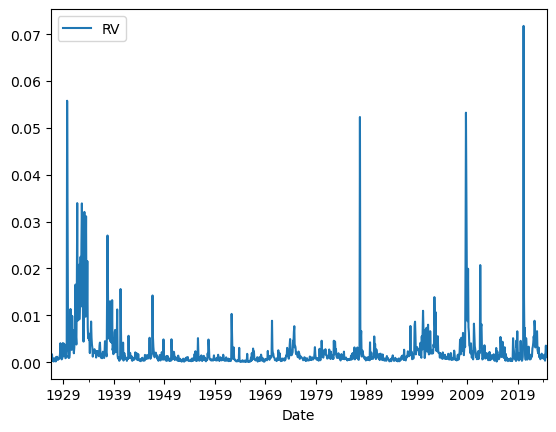

In [69]:
from pandas.tseries.offsets import MonthEnd
endofmonth=df_factor.index+MonthEnd(0)
RV=df_factor[['Mkt-RF']].groupby(endofmonth).apply(lambda x: ((x-x.mean())**2).sum())
# rename column to clarify
RV=RV.rename(columns={'Mkt-RF':'RV'})
RV.plot()
RV.head()

Note how clustered volatility is

If variance was high this month, probably will be high next month too

You certainly can do better

In [110]:
# aggregate daily returns to monthly returns
Ret=(1+df_factor).groupby(endofmonth).prod()-1
# rename columns to clarify
# Merge Ret (monthly return) with RV (realized variance and weights)
df=RV.merge(Ret,how='left',left_index=True,right_index=True)
# construct excess returns

# lag RV by one month
df['RV_lag']=df['RV'].shift(1)

df.mean()

RV        0.002429
RF        0.002686
Mkt-RF    0.006849
RV_lag    0.002431
dtype: float64

C:\Users\alan.moreira\AppData\Local\Temp\ipykernel_9296\1968402388.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantile_means = df.groupby('Quantile').mean()
C:\Users\alan.moreira\AppData\Local\Temp\ipykernel_9296\1968402388.py:8: RuntimeWarning: invalid value encountered in scalar power
  quantile_means.index = quantile_means.index.map(lambda x: round((x.left*12)**0.5, 2))


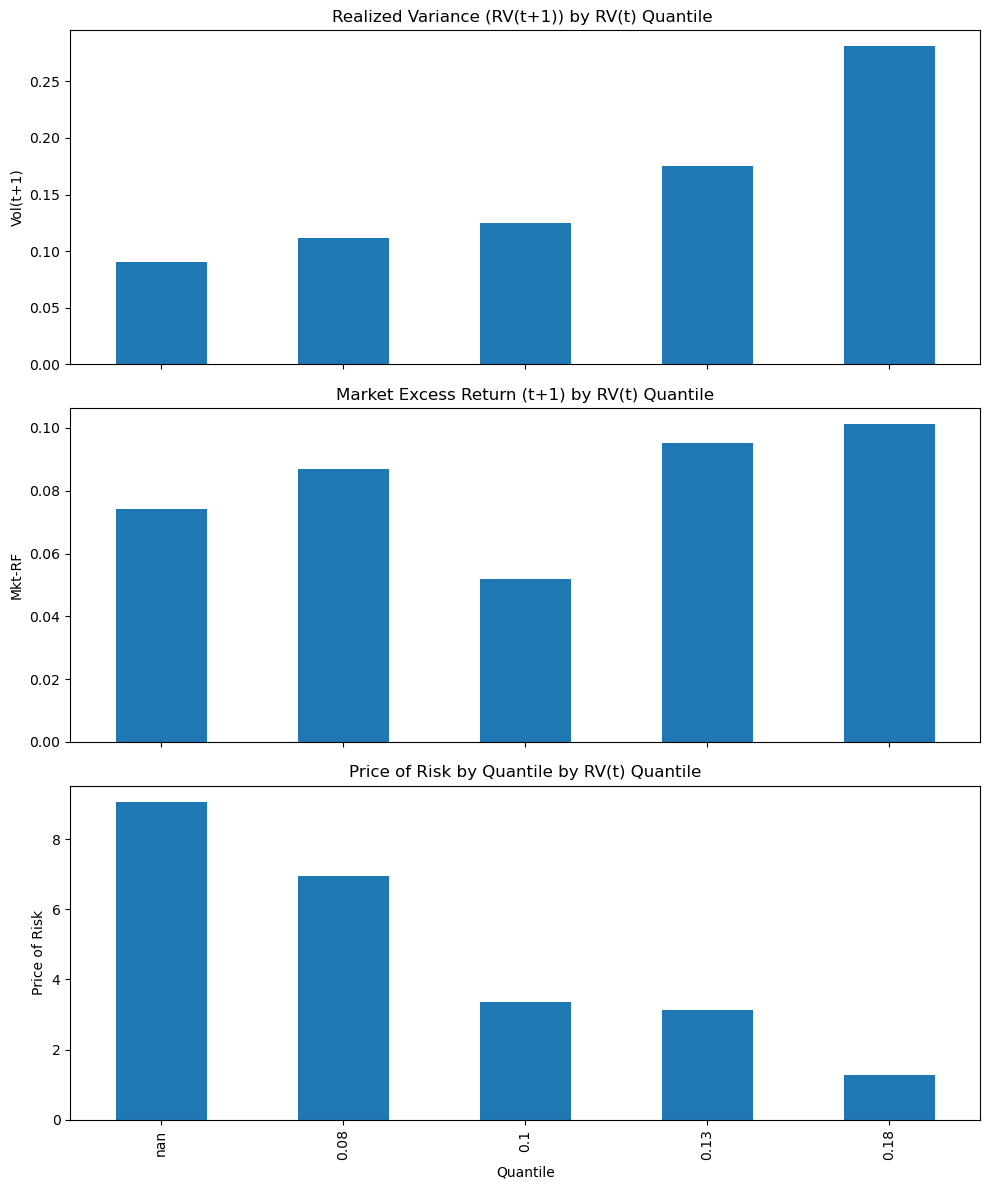

In [111]:




# Create quantile groups based on the RV variable


df['Quantile'] = pd.qcut(df['RV_lag'], q=5)

# Group by quantile and calculate the mean for each column
quantile_means = df.groupby('Quantile').mean()
quantile_means.index = quantile_means.index.map(lambda x: round((x.left*12)**0.5, 2))


quantile_means ['priceofrisk']=quantile_means['Mkt-RF']/(quantile_means['RV'])


# Display the mean of quantiles for each column

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
((quantile_means.RV*12)**0.5).plot(kind='bar', ax=axs[0])
axs[0].set_title('Realized Variance (RV(t+1)) by RV(t) Quantile ')
axs[0].set_ylabel('Vol(t+1)')

(quantile_means['Mkt-RF']*12).plot(kind='bar', ax=axs[1])
axs[1].set_title('Market Excess Return (t+1) by RV(t) Quantile')
axs[1].set_ylabel('Mkt-RF')

quantile_means.priceofrisk.plot(kind='bar', ax=axs[2])
axs[2].set_title('Price of Risk by Quantile by RV(t) Quantile')
axs[2].set_ylabel('Price of Risk')
axs[2].set_xlabel('Quantile')

plt.tight_layout()
plt.show()


We see that following months of high variance--on the right-- you don't really get higher returns

if you focus on the ratio -- the price of risk

$$E[\frac{r^e_{t+1}}{RV_{t+1}(r^e)}|RV_t]$$

you see that it is massively decreasing with variance

Average returns are not constant--**but are close to**-- 

so the natural strategy to exploit this pattern is to lever up when vol is low and reduce exposure when vol is high.

Specifically we Buy the market at the closing price of month t according to the rule:
   
   $$w_t=\frac{c}{rv_t},$$

If W<1, invest in the risk-free rate, if w>1, borrow to fund a bigger position
   
where $c$ is some constant.
   
  * Hold the position for a month
  
  * The returns of the strategy are given by
  
  

 
  $$ r^{VolTiming}_{t+1}=r_{f,t+1}+\frac{c}{rv_t}r^{MKT-RF}_{t+1}$$



## **From signal to weights**

* weight on the market:

$$x_t=c\frac{1}{rv_t}$$

* weight on the risk-free rate: $1-x_t$

* $c$ controls how levered is the strategy on average.

* As we saw before all timing strategies involved some in and out of the market, but you also need to determine the average position. That is the role of $c$.

* There are many ways to choose c

* while c does not impact the strategy Sharpe Ratio, it impacts the amount of leverage that the strategy will take

* Here lets keep it simple and simply choose it so that the position on the market is 1 on average

$$E[x_t]=E[c\frac{1}{rv_t}]=1$$

implies $c=\frac{1}{E[\frac{1}{rv_t}]}$


1.0

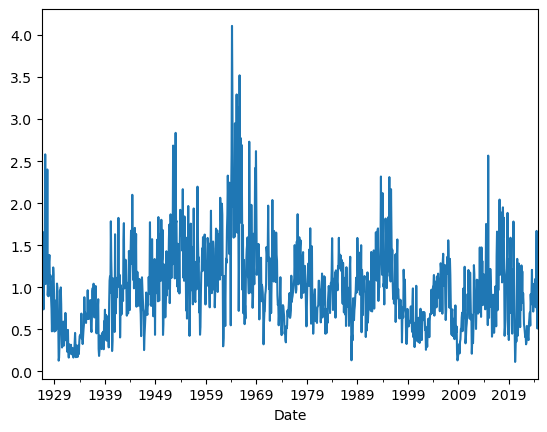

In [ ]:
# calculate weights for the risky assets (market)
c=1/(1/df.RV_lag*).mean()
df['Weight']=c/df.RV_lag

df.Weight.plot()
df.Weight.mean()

You see that leverage gets really high. 

As high as 10!

You can see that in your position in the risk-free rate which exactly mirrors that



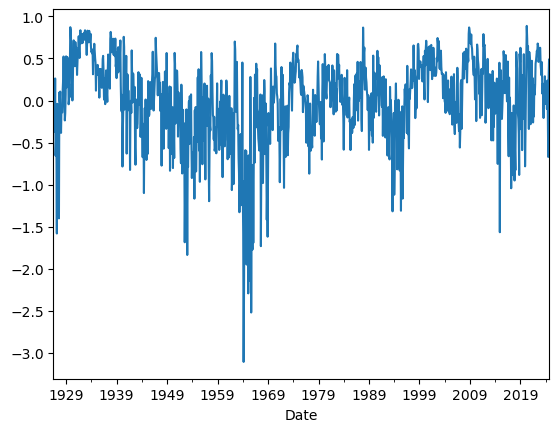

In [121]:
# plot the weights on the risk-free rate
(1-df.Weight).plot()
plt.show()

## **Construct strategy returns**

* Now to construct the strategy return recall that we use the relaized variance in month t to buy the market at the closing of month t and earn the return accrued in month t+1


* I will call the strategy as $\textbf{VMS}$ (Volatility Managed Strategy)

In [122]:
# now construct the return of the strategy
df['VMS']=df.Weight*df['Mkt-RF']

We can see the cumulative returns of the market and the volatility managed strategy

<Axes: xlabel='Date'>

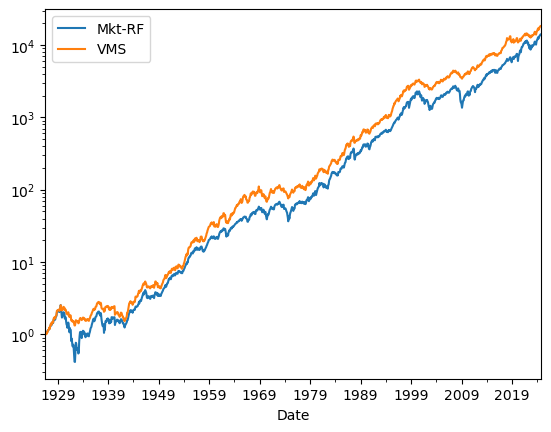

In [123]:
df[['Mkt-RF','VMS']].add(df['RF']+1,axis=0).cumprod().plot(logy=True)

**Sharpe ratio**

The VMS strategy ends up with a 20% higher Sharpe Ratio

In [124]:
(df[['Mkt-RF','VMS']].mean()/df[['Mkt-RF','VMS']].std())*12**0.5

Mkt-RF    0.445526
VMS       0.548945
dtype: float64

**Tail risk**

The VMS bears substantially less tail risk as well

We can look at the the percentile 0.5% of the return distribution

In [118]:
df[['Mkt-RF','VMS']].quantile(q=0.005)

Mkt-RF   -0.181863
VMS      -0.139248
Name: 0.005, dtype: float64

**Things to try**


- How well it works with VIX instead of RV?
- How well it works with standard deviation instead of variance
- How well it works if we put leverage limits
- How well it works if we combine an expected return signal with the volatility signal?

In [140]:
def volmanaged(df):
    factor=df.name
    endofmonth=df.index+MonthEnd(0)
    RV=df.groupby(endofmonth).apply(lambda x: ((x-x.mean())**2).sum())
    Signal=1/RV.shift(1)
    Signal.name='signal'

    Ret=(1+df).groupby(endofmonth).prod()-1
    # rename columns to clarify
    # Merge Ret (monthly return) with RV (realized variance and weights)
    df=pd.DataFrame(Signal).merge(Ret,how='left',left_index=True,right_index=True)



    c=1/(df.signal).mean()
    df['Weight']=c/df.signal
    df['VMS']=df.Weight*df[factor]
    SR=(df.mean()/df.std())*12**0.5
    TR=df.quantile(q=0.005)
    return SR,TR,df

volmanaged(df_factor['Mkt-RF'])    

(RV        1.664722
 Mkt-RF    0.445526
 RV_lag    1.664846
 Weight    3.143894
 VMS       0.514105
 dtype: float64,
 RV        0.000113
 Mkt-RF   -0.181863
 RV_lag    0.000113
 Weight    0.021742
 VMS      -0.139248
 Name: 0.005, dtype: float64,
                   RV    Mkt-RF    RV_lag    Weight       VMS
 Date                                                        
 1926-07-31  0.000492  0.028846       NaN       NaN       NaN
 1926-08-31  0.000878  0.026697  0.000492  1.497461  0.039977
 1926-09-30  0.000565  0.003724  0.000878  0.839167  0.003125
 1926-10-31  0.001689 -0.033011  0.000565  1.304151 -0.043051
 1926-11-30  0.000336  0.025847  0.001689  0.436231  0.011275
 ...              ...       ...       ...       ...       ...
 2024-06-30  0.000329  0.027796  0.000761  0.968390  0.026917
 2024-07-31  0.001757  0.011986  0.000329  2.236833  0.026810
 2024-08-31  0.003530  0.015949  0.001757  0.419311  0.006687
 2024-09-30  0.001580  0.017348  0.003530  0.208700  0.003620
 2024-10-

## A bond-equity strategic investment problem of an international investor


* we will assume here that the risk-premium is being generated from a constant distribution

* this is wrong, but for large well diversified portfolio not too bad

* under this assumption, our estimation problem amounts to using sample means

* ths risk-free rate is time-varying so we will have to deal with it


We start by loading out return data

In [2]:
url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
Data = pd.read_csv(url,na_values=-99)
Data['Date']=pd.to_datetime(Data['Date'])
Data=Data.set_index(['Date'])
# the assets are the risk-free rate, the us equity market, the us bond market, the emerging market, the global equity market (without US), and the global bond market (without US)

Data=Data.rename(columns={Data.columns[1]: "MKTUS",Data.columns[2]: "BondUS",
                          Data.columns[3]: "EM",Data.columns[4]: "MKTxUS",Data.columns[5]: "BondxUS" })
Data.tail()

,RF,MKTUS,BondUS,EM,MKTxUS,BondxUS
Date,,,,,,
2016-08-31,0.0002,0.0052,-0.008417,0.025186,0.000838,-0.009552
2016-09-30,0.0002,0.0027,-0.016417,0.013153,0.012736,0.009979
2016-10-31,0.0002,-0.0200,-0.049460,0.002474,-0.020383,-0.043476
2016-11-30,0.0001,0.0487,-0.081636,-0.045971,-0.019798,-0.050359
2016-12-31,0.0003,0.0185,-0.005296,0.002904,0.034383,-0.023207


In [3]:
# we start by constructing excess returns by subtracting the risk-free rate from the returns of the assets and we drop the risk-free rate column
Re=Data.subtract(Data['RF'],axis=0).drop(['RF'],axis=1)

# we compute the mean and covariance matrix of the excess returns
ERe=Re.mean()
print(ERe)
Cove=Re.cov()
print(Cove)



MKTUS      0.005140
BondUS     0.002523
EM         0.006923
MKTxUS     0.004149
BondxUS    0.002054
dtype: float64
            MKTUS    BondUS        EM    MKTxUS   BondxUS
MKTUS    0.001948  0.000111  0.001292  0.001264  0.000187
BondUS   0.000111  0.001227 -0.000204 -0.000013  0.000264
EM       0.001292 -0.000204  0.003556  0.001661  0.000249
MKTxUS   0.001264 -0.000013  0.001661  0.002182  0.000422
BondxUS  0.000187  0.000264  0.000249  0.000422  0.000407


Suppose I want to reconstruct my current estimates of Expected returns and the covariance matrix of returns ( and not excess returns), What do I do?

Simply add the current risk-free rate to you estimate of the expected return

In [4]:
# set the risk-free rate to the current value of the 3-month T-bill rate divided by 12 to make it a monthly rate
rf=0.0525/12
# add to our estimate of risk-premiumns to get our estimate of expected returns

ER=ERe+rf

What about the covariance piece?

## Numerical solution

Lets start by solving

$ \max_X E[X'R_T]$ subject to $Var(X'R_T)\leq Vmax$

In [18]:
# STEP 1: define the fucntion that computes the portfolio variance and expected returns given a vector of weights X (initially set to equal weights)

def portfolio_variance(X=np.ones(5)/5):
    return X @ Cove @ X

def portfolio_expected_return(X=np.ones(5)/5):
     return X @ ER

print(portfolio_variance())
print(portfolio_variance(np.array([0.5,0.5,0,0,0])))

print(portfolio_expected_return())
print(portfolio_expected_return(np.array([0.5,0.5,0,0,0])))

0.0007914039297139135
0.0008490361488465391
0.008532889760767246
0.00820649669319938


In [19]:
# STEP 2: define the constraint functions, 

# here we will have one inequality for the portfolio variance , lets say a volatility of 10% per year. How do we translate this into a monthly variance?

# and one equality constraint for the weights to sum to one



Vmax=(0.2**2/12)
cons= ({'type': 'ineq',
          'fun' : lambda X: -portfolio_variance(X)+Vmax},
          {'type': 'eq',
          'fun' : lambda X: np.sum(X)-1})

# the constraint is normalized so that

#cons=({'type': 'ineq',
#          'fun' : lambda X: F(X)})

#means F(X)>=0

* Finally we are ready to do our minimization
* `options={'disp': True}`: tell python to report intermediary steps so we can check if the algorithm is doing progress towards a solution.
* There is a variety of additional parameters that you can pass to the minimizer. 
* see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


In [20]:
# STEP 3: solve the minimization problem with constraints and save as `sol`
from scipy.optimize import minimize
X0=np.ones(5)/5
sol = minimize(lambda X: -portfolio_expected_return(X),X0, constraints=cons, options={'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.011929088527573371
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


In [21]:
#optimal weights
print(sol.x)
# optimal expected return at the annual frequency
print(portfolio_expected_return(sol.x)*12)
# optimal portfolio volatility at the annual frequenc
(portfolio_variance(sol.x)*12)**0.5

[ 0.65116149  0.38641724  0.83880728 -0.36993912 -0.50644688]
0.14314906233088046


0.20000201016577546

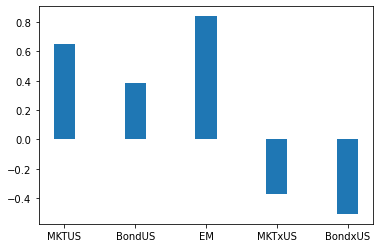

In [22]:
# below I am plotting the solution weights.
width=0.3
fig, ax = plt.subplots()
index=np.arange(sol.x.shape[0])

ax.bar(index,sol.x,width)

ax.set_xticks(index)
ax.set_xticklabels(ER.index)
plt.show()

Here we assumed the portfolio has to be fully invested in risky assets.

There is no leverage (borrowing at the risk-free rate)

but there is shorting (raising additional funds by selling one asset)

Note that is X0+X1=1, if X0<0, then X1>1

 



## Introducing a benchmark

* in mutual funds there is often a benchmark, say the S&P 500 and the manager has a mandate to have a tracking error relative to the benchmark that is low enough, say $Tmax$

* and the manager is compensated only with respect to the returns above this benchmark

* tracking error is the volatility of the portfolio relative to the benchmark: $\sqrt{var(X'R_T-R^{benchmark}_T)}$

The manager problem is ro maximize benchmark adjusted returns subject to some tracking error constraint

$ \max_X E[X'R_T-R^{benchmark}_T]$ subject to $Var(X'R_T-R^{benchmark}_T)\leq Tmax$


Assuming benchmark is in set of traded assets, you car write 

$ \max_X E[X'R_T-1_b'R_T]$ subject to $Var(X'R_T-1_b'R_T)\leq Tmax$

Which can be written as


$ \max_X E[(X-1_b)'R_T]$ subject to $(X-1_b)'Var(R_T)(X-1_b)\leq Tmax$

In [23]:

def portfolio_variance(X=np.ones(5)/5,Xbenchmark=np.array([0,0,0,0,0])):
    return (X -Xbenchmark)@ Cove @ (X-Xbenchmark)

def portfolio_expected_return(X=np.ones(5)/5,Xbenchmark=np.array([0,0,0,0,0])):
     return (X-Xbenchmark) @ ER


Xb=np.array([1,0,0,0,0])
Vmax=(0.2**2/12)
cons= ({'type': 'ineq',
          'fun' : lambda X: -portfolio_variance(X,Xbenchmark=Xb)+Vmax},
          {'type': 'eq',
          'fun' : lambda X: np.sum(X)-1})

X0=np.ones(5)/5
solb = minimize(lambda X: -portfolio_expected_return(X,Xbenchmark=Xb),X0, constraints=cons, options={'disp': True})


Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.005220575391068462
            Iterations: 15
            Function evaluations: 90
            Gradient evaluations: 15


In [25]:
print(Cove.index)
#optimal weights no benchmark
print(sol.x)
#optimal weights with benchmark
print(solb.x)



Index(['MKTUS', 'BondUS', 'EM', 'MKTxUS', 'BondxUS'], dtype='object')
[ 0.65116149  0.38641724  0.83880728 -0.36993912 -0.50644688]
[ 1.71916096  0.06129325  0.73328686 -0.28549667 -1.2282444 ]


What happen here? Why the position in the market went up? Is that what you would expect?

In [ ]:
# optimal expected return at the annual frequency
print(portfolio_expected_return(solb.x)*12)
# portfolio volatility pf optimal portfolio at the annual frequency
print((portfolio_variance(solb.x)*12)**0.5)
#Trackign error
print((portfolio_variance(solb.x,Xbenchmark=Xb)*12)**0.5)
#Benchmark adjsuted returns
print((portfolio_expected_return(solb.x,Xbenchmark=Xb)*12))

## Information Ratio

Information ratio is how much you are expected to make in excess of the benchmark, divided by how much risk you are taking relative to the benchmark

$$InformationRatio=\frac{E[r_p-r_b]}{\sigma(r_p-r_p)}$$

In [ ]:
#The information ratio is the benchmark adjusted return divided by the tracking error
print((portfolio_expected_return(sol.x,Xbenchmark=Xb)*12)/(portfolio_variance(sol.x,Xbenchmark=Xb)*12)**0.5)

0.31322388844974003


Other things to do



Trace out how the optimal expected return varies as you change Vmax. In yearly volatility units try 6.5%, 7%, 8% , 10% ,15%,30%. Plot the resulting pairs in the scatter plot with the expected return in the y-axis and the volatility in the x-axis. What do you find?

Add the risk-free rate among the assets. There are different ways to do this. But a simple one is to change the expected return function  `X@ER+(1-np.sum(X))*rf`
* now X is the vector of risky assets only and (1-np.sum(X)) is whatever is the residual
* if this residual is positive you park in cash and earn rf
* if negative you borrow at the rf rate
* now your total weights mechanically add up to 1
* so you need to take out the equality constraint

Add a shorting constraint, say you can only short equities but not bonds, that is X>0 for certain assets

Add a leverage cap, so that the sum of your risky assets cannot exceed 1 too much, np.sum(X)-1 is called your leverage, so you can limit it to 1, so that for each dollar you have you borrow at most 1 dollar

Modify the expected return function to incorporate practical frictions in trading. For example, when you borrow you typically pay more than what you can invest at, there is a borrowing spread. Analogously if you short a stock, you have to pay an extra fee

## Analytical solution

The analytical solution assumes

- free borrowing and lending at risk-free rate
- Shorting without any shorting fees

The optimal weights are 

$$X=\sqrt{\frac{Vmax}{E[R^e]'Var(R^e)^{-1}E[R^e]}}Var(R^e)^{-1}E[R^e]$$

Where Vmax is in monthly variance units


Note that $\frac{Vmax}{E[R^e]'Var(R^e)^{-1}E[R^e]}$ is a number. Is basically a leverage factor. It leverage up (or down) the portfolio $Var(R^e)^{-1}E[R^e]$ so that the resulting portfolio has the desired target variance

This portfolio $Var(R^e)^{-1}E[R^e]$ is quite special because it has the highest Sharpe-ratio among all possible combinations of these assets





## Sharpe-ratio !

Sharpe ratio is probably the most used concept in money management, it comes in honor of William Sharpe ( the dude that discovered the CAPM). It reflects how much additional expected return you are getting per unit of volatility. Say you have a portfolio with expected returns $E[r_p]$

$$SharpeRatio=\frac{E[r_p]-rf}{\sigma(R_p)}$$


So a portfolio that has the highest sharpe ratio is nice because it is efficient. 

You take the minimum amount of risk that you need to take to achieve a expected return

or conversely you get the maximum possible expected return for a given level of risk that you are willing to take

_____

*Aside: Matrix inversion*

* You only need to understand how to operationaize it and in an conceptual level what it does

* But you don't need to follow all the mathematical details

* If you are interested. you can look in our linear algebra review in https://amoreira2.github.io/quantitativeinvesting/chapters/scientific/linear_algebra1.html

* I also provide a summary below

* Note that $(2)^{-1}=1/2=0.5$ (naturally!)

* $(Var(R^e))^{-1}$ is just like this 

* but more complicated because $Var(R^e)$ is a N by N matrix and we can't simply divide over to solve for X

* The definition of the inverse function is $f(x)=x^{-1}=y$ where $y*x=1$

* for matrices it is the same: $(Var(R^e))^{-1}Var(R^e)=I$, but now instead of 1, we have an identity matrix, which is a matrix with 1's in the diagonal and zero everywhere else


Thankfully we have a function in python that does just that




In [52]:
# start with a 2 by 2 matrix
a=np.array([[3,7],[0,9]])
print(a)

# compute the inverse
ainv=np.linalg.inv(a) 

ainv

[[3 7]
 [0 9]]


array([[ 0.33333333, -0.25925926],
       [ 0.        ,  0.11111111]])

In [53]:
# indeed ainv is the inverse of a because ainv @ a = I
ainv @ a

array([[1., 0.],
       [0., 1.]])

This portfolio is very special so it has many names

1. maximum sharpe ratio portfolio

2. mean-variance efficient portfolio (MVE)

3. Tangency portfolio

Names 1 and 2 are pretty clear. Name 3 will become clear later in the course

________________________
## **Finding the Mean-variance efficient portfolio**


First lets construct our vector of expected excess returns for our risky two assets US equity market and International equity market

In [64]:
assets=['MKTUS','MKTxUS']
e=ERe[assets]

e

MKTUS     0.005140
MKTxUS    0.004149
dtype: float64

We start by estimating the covariance matrix from our data $Var(R^e)$

In [65]:
c=Cove.loc[assets,assets]

c

,MKTUS,MKTxUS
MKTUS,0.001948,0.001264
MKTxUS,0.001264,0.002182


We then invert the covariance matrix $Var(R^e)^{-1}$

In [67]:
cinv=np.linalg.inv(c) 

cinv

array([[ 822.50792137, -476.49212708],
       [-476.49212708,  734.40580739]])

we then use the dot product to cross-mulitply our vector of expected excess returns by the inverse of the covariance matrix

$$Var(R^e)^{-1}E[R^e]$$

In [68]:
Wmve=cinv @ e
Wmve

array([2.25099751, 0.597729  ])

In [73]:
Vmax=(0.2**2/12)
Wmve * (Vmax/(e @cinv @ e))**0.5

array([0.53401107, 0.14180109])

Things to try


Verify that indeed the entire class of portfolios that solve the problem for different variance targets Vmax are also MVE ( i.e they all have the max sharpe ratio)

What is the allocation to the risk-free rate? How do you find it? How does it change as you increase/decrease Vmax?


How does max SR change as you go from 
1. only investing in the US equity market
1. investing in US equities and US bonds
1. Invest everywhere except emerging markets
1. investing everywhere including emerging markets
1. investing only in global equities and global bonds

Compare the gains of investing domestically ( US equities and bonds)  with investing internationally as well (US equities, US bonds, Global equities, global bonds).

Why the SR is going up ?What properties of the returns moments the mean-variance optimizer are exploiting? 

Do we think those are reliable properties? What is the alternative?

For the four investment opportunity sets above, compute the optimal expected returns for the following volatilities 6.5%, 7%, 8% , 10% ,15%,30%. Plot the results in a scatter plot with volatility in the X-axis and expected returns in the y-axis. You should see 5 lines. Why they look like that?

Compare the benefits of a US investor to invest globally and the benefit of an international investor investing in the US ( ignore Emerging markets). Looking at individual assets risk-premiums and volatility explain the benefits of investing across multiple assets